In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from scipy import optimize as opt
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)

### Задание 1.7. Марковские модели (часть 2) ###

#### *1. Интернет в некоторой организации может отказать из-за сбоя на сервере (среднее время работы 10 сут., среднее время ремонта 2 сут.) или из-за перегрузки сети (среднее время работы 14 сут., среднее время высвобождения ресурсов 5 сут.). Постройте марковскую модель процесса функционирования сети. Вычислите:* ####

#### *(a) стационарный коэффициент готовности системы;* <br>
#### *(b) коэффициент готовности (нестационарный); постройте график зависимости от времени;* <br>
#### *(c) момент времени, начиная с которого коэффициент готовности можно считать стационарным.* <br>
#### *Указание*. Его можно считать стационарным при |K(t) − K| < 0.001 ####

Обозначим некоторые с.в.:

1. $\xi_1$ - время работы сервера до отказа, $\lambda_1=\frac{1}{10}сут.^{-1}$
2. $\xi_2$ - время ремонта сервера, $\mu_1=\frac{1}{2}сут.^{-1}$
3. $\eta_1$ - время работы сети до отказа, $\lambda_2=\frac{1}{14}сут.^{-1}$
3. $\eta_2$ - время ремонта сети, $\mu_2=\frac{1}{5}сут.^{-1}$

Все с.в. имеют показательное распределение с указанным параметром.

Система (интернет) состоит из сервера и сети. Система работоспособна, когда оба элемента работоспособны.
Обозначим следующие состояния:

0. Сервер и сеть работают исправно (система исправна);
1. Сервер сбоит, сеть работает исправно;
2. Сервер работает исправно, сеть перегружена;
3. Сервер сбоит, сеть перегружена

$$\Lambda=[\lambda_{ij}]_{ij}=\left[\begin{matrix}
-\lambda_1-\lambda_2 & \lambda_1 & \lambda_2 & 0 \\
\mu_1 & -\mu_1-\lambda_2 & 0 & \lambda_2 \\
\mu_2 & 0 & -\mu_2-\lambda_1 & \lambda_1 \\
0 & \mu_2 & \mu_1 & -\mu_1-\mu_2
\end{matrix}\right]$$

In [2]:
N = 4
lambda1 = sp.Rational(1, 10)
mu1 = sp.Rational(1, 2)
lambda2 = sp.Rational(1, 14)
mu2 = sp.Rational(1, 5)
Lambda = sp.Matrix([
    [-lambda1-lambda2, lambda1, lambda2, 0],
    [mu1, -mu1-lambda2, 0, lambda2],
    [mu2, 0, -mu2-lambda1, lambda1],
    [0, mu2, mu1, -mu1-mu2]
])
Lambda

[-6/35  1/10  1/14     0  ]
[                         ]
[ 1/2   -4/7    0    1/14 ]
[                         ]
[ 1/5    0    -3/10  1/10 ]
[                         ]
[  0    1/5    1/2   -7/10]

Составим и решим систему уравнений Колмогорова
$$
\begin{cases}
\frac{d\overrightarrow{p}}{dt}(t)=\Lambda'\overrightarrow{p}(t)\\
\sum^3_{i=0}{p_i(t)}=1\\
p_0(0)=1,\\
p_i(0)=0, i\neq 0
\end{cases}
$$

Для решения системы воспользуемся преобразованиями Лапласа
$$p_i(t)\risingdotseq q_i(s)$$
$$\frac{dp_i}{dt}(t)\risingdotseq sq_i(s)-p_i(0)$$

$$
\begin{cases}
s\overrightarrow{q}(s)-\overrightarrow{p}(0)=\Lambda'\overrightarrow{q}(s)\\
\sum^3_{i=0}{q_i(t)}=\frac{1}{s}\\
\end{cases}
$$

Получаем следующую систему уравнений
$$
\begin{cases}
q_{0} s - 1 = - \frac{6 q_{0}}{35} + \frac{q_{1}}{2} + \frac{q_{2}}{5}\\
q_{1} s = \frac{q_{0}}{10} - \frac{4 q_{1}}{7} + \frac{q_{3}}{5}\\
q_{2} s = \frac{q_{0}}{14} - \frac{3 q_{2}}{10} + \frac{q_{3}}{2}\\
q_{0} + q_{1} + q_{2} + q_{3} = \frac{1}{s}
\end{cases}
$$

In [3]:
s, t = sp.symbols('s t')
p = sp.symbols(f'p_0:{N}')
q = sp.symbols(f'q_0:{N}')
pm = sp.Matrix(p)
qm = sp.Matrix(q)

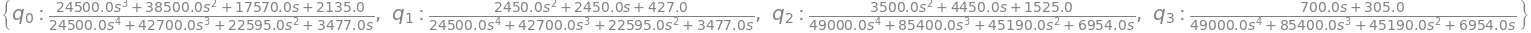

In [4]:
p0 = np.zeros(N)
p0[0] = 1
lhs_eqs = [
    s*q[i] - p0[i] for i in range(N)
]
rhs_eqs = [
    (Lambda.col(i).T * qm)[0] for i in range(N)
]
eqs = [sp.Eq(lhs, rhs) for lhs, rhs in zip(lhs_eqs, rhs_eqs)]
system = eqs[:-1] + [sp.Eq(sum(q), 1/s)]
sol = sp.solve(system, q)
sol

In [5]:
pt = []
for i in range(4):
    res = sum([sp.inverse_laplace_transform(Q, s, t).replace(sp.Heaviside(t), 1) for Q in sol[q[i]].apart().args])
    res_simplified = sp.nsimplify(res)
    pt.append(res_simplified)
pt

$$
\begin{cases}
p_{0} = \frac{35}{57} + \frac{7 e^{- \frac{3 t}{5}}}{57} + \frac{25 e^{- \frac{19 t}{70}}}{114} + \frac{5 e^{- \frac{61 t}{70}}}{114}\\
p_{1} = \frac{7}{57} - \frac{7 e^{- \frac{3 t}{5}}}{57} + \frac{5 e^{- \frac{19 t}{70}}}{114} - \frac{5 e^{- \frac{61 t}{70}}}{114}\\
p_{2} = \frac{25}{114} + \frac{5 e^{- \frac{3 t}{5}}}{114} - \frac{25 e^{- \frac{19 t}{70}}}{114} - \frac{5 e^{- \frac{61 t}{70}}}{114}\\
p_{3} = \frac{5}{114} - \frac{5 e^{- \frac{3 t}{5}}}{114} - \frac{5 e^{- \frac{19 t}{70}}}{114} + \frac{5 e^{- \frac{61 t}{70}}}{114}
\end{cases}
$$

A) стационарный коэффициент готовности системы

Коэффициент готовности - это вероятность того, что объект окажется работоспособным в произвольный момент времени (кроме планируемых периодов, в течение которых использование объекта по назначению не предусматривается).

По факту, $K(t) = p_0(t)$

Тогда стационарный коэффициент готовнсоти будет равен:

$$K=\lim\limits_{t\to\infty}K(t)=\lim\limits_{t\to\infty}p_0(t)=\frac{35}{57}\approx 0.614035=61.4035\%$$

In [6]:
K_stat = sp.limit(pt[0], t, np.inf)
K_stat, K_stat.evalf()

Б) коэффициент готовности (нестационарный); постройте график зависимости от времени;

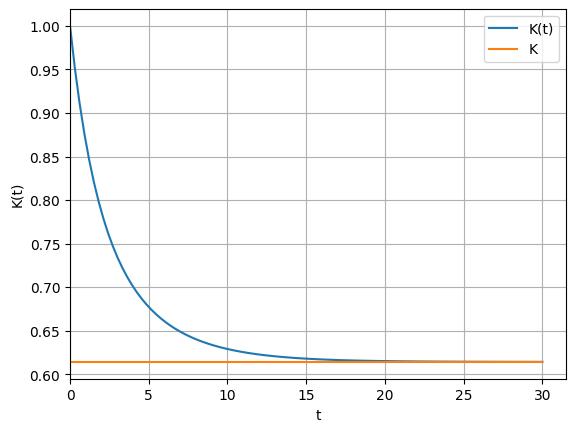

In [7]:
K = sp.lambdify(t, pt[0], 'numpy')
l, r = 0, 30
x = np.linspace(l, r, 100)
y = K(x)
plt.plot(x, y)
plt.plot([l, r], [K_stat, K_stat])
plt.xlabel('t')
plt.xlim(0)
plt.grid()
plt.ylabel('K(t)')
plt.legend(['K(t)', 'K'])
plt.show()

В) момент времени, начиная с которого коэффициент готовности можно считать стационарным.

*Указание*. Его можно считать стационарным при $|K(t) − K| < 0.001$.

In [8]:
eq = sp.Lt(sp.Abs(pt[0]-K_stat), 0.001)
eq

In [9]:
f = sp.lambdify(t, eq.lhs-eq.rhs, 'numpy')
t0 = opt.fsolve(f, 0)[0]
t0

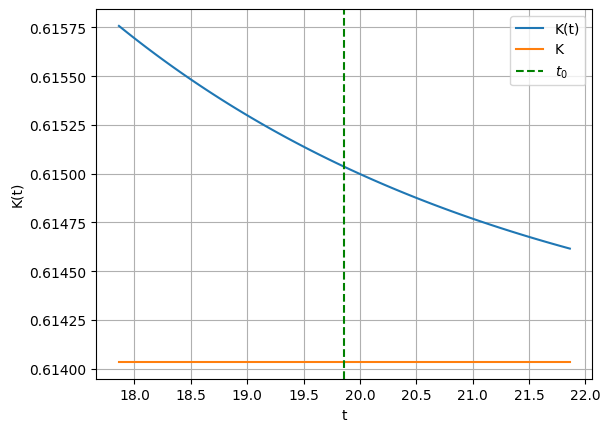

In [10]:
K = sp.lambdify(t, pt[0], 'numpy')
l, r = t0-2, t0+2
x = np.linspace(l, r, 100)
y = K(x)
plt.plot(x, y)
plt.plot([l, r], [K_stat, K_stat])
plt.axvline(t0, color='green', linestyle='--')
plt.xlabel('t')
plt.ylabel('K(t)')
plt.legend(['K(t)', 'K', r'$t_0$'])
plt.grid()
plt.show()

Можно ли пренебречь одновременным отказом сервера и сети?

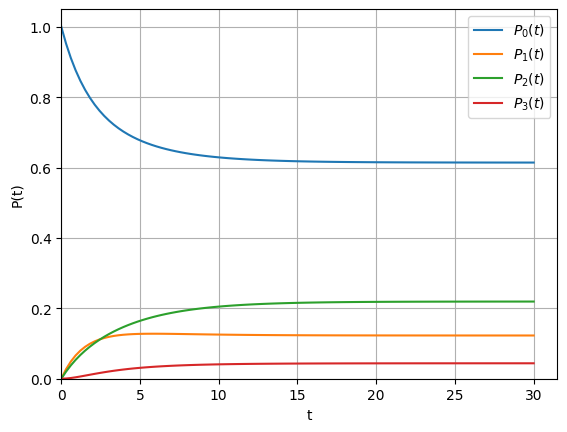

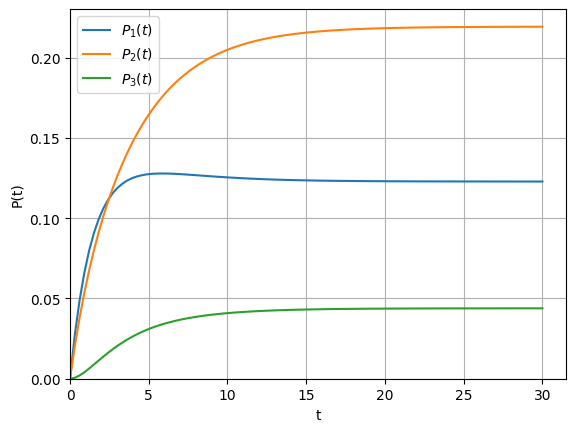

In [11]:
Ps = [sp.lambdify(t, pt[i], 'numpy') for i in range(4)]
l, r = 0, 30
x = np.linspace(l, r, 100)
for P in Ps:
    plt.plot(x, P(x))
plt.xlabel('t')
plt.ylabel('P(t)')
plt.legend([r'$P_0(t)$', r'$P_1(t)$', r'$P_2(t)$', r'$P_3(t)$'])
plt.grid()
plt.xlim(0)
plt.ylim(0)
plt.show()
for P in Ps[1:]:
    plt.plot(x, P(x))
plt.xlabel('t')
plt.ylabel('P(t)')
plt.legend([r'$P_1(t)$', r'$P_2(t)$', r'$P_3(t)$'])
plt.grid()
plt.xlim(0)
plt.ylim(0)
plt.show()

Считаем установившиеся вероятности в бесконечности:

In [12]:
for i in range(1, 4):
    print(f'p_{i}({sp.oo}) = {pt[i].replace(t, np.inf).evalf()}')

p_1(oo) = 0.122807017543860
p_2(oo) = 0.219298245614035
p_3(oo) = 0.0438596491228070


Получили 4,4%, следует не пребрегать

#### *2. (\*) Система состоит из 3-х рабочих насосов и 1-го резервного. Резерв ненагруженный. Наработка на отказ и время восстановления каждого насоса – случайные величины, распределенные по показательному закону с параметрами $\lambda=0.01ч^{−1}$ и $\mu=0.1ч^{−1}$ соответственно. Для включения резервного насоса требуется случайное время, распределенное по показательному закону с параметром $\gamma=4ч^{-1}$. Отказ системы наступает тогда, когда в работе остается 1 насос. В этом случае работоспособный насос отключается и не может отказать. Постройте марковскую модель, считая, что ремонтных единиц достаточно. Найдите вероятность отказа системы в установившемся режиме.* ####

Обозначим с.в. (все они имеют показательное распределение):

1. $\xi_i$ - время работы насоса до отказа, $\lambda=0.01ч^{−1}$;
2. $\eta_i$ - время восстановления насоса, $\mu=0.1ч^{−1}$;
3. $\zeta$ - время включения резервного насоса, $\gamma=4ч^{−1}$

Рассмотрим следующие состояния системы:

0. Исправны 3 насоса, резерв выключен; $4/4$
1. Исправны 2 насоса, резерв включается (отказал 1 рабочий); $3/4$
2. Исправны 3 насоса, резерв включен (отказал 1 рабочий); $3/4$
3. Исправны 2 насоса, резерв включен (отказало или 2 рабочих, или 1 рабочий и резервный); $2/4$
4. Отказ системы, резерв включается (отказали 2 рабочих до включения резерва); $2/4$
5. Отказ системы, резерв включен (отказали 3 рабочих или 2 рабочих и резервный). $1/4$


$$\Lambda=\left[\begin{matrix}
-3\lambda & 3\lambda & 0 & 0 & 0 & 0\\
\mu & -2\lambda-\mu-\gamma & \gamma & 0 & 2\lambda & 0\\
\mu & 0 & -3\lambda-\mu & 3\lambda & 0 & 0\\
0 & 0 & 2\mu & -2\lambda-2\mu & 0 & 2\lambda\\
0 & 2\mu & 0 & \gamma & -2\mu-\gamma & 0\\
0 & 0 & 0 & 3\mu & 0 & -3\mu
\end{matrix}\right]$$

In [13]:
N = 6
lambda0 = sp.Number(0.01)
mu = sp.Number(0.1)
gamma = sp.Number(4)
Lambda = sp.Matrix([
    [-3*lambda0, 3*lambda0, 0, 0, 0, 0],
    [mu, -2*lambda0-mu-gamma, gamma, 0, 2*lambda0, 0],
    [mu, 0, -3*lambda0-mu, 3*lambda0, 0, 0],
    [0, 0, 2*mu, -2*lambda0-2*mu, 0, 2*lambda0],
    [0, 2*mu, 0, gamma, -2*mu-gamma, 0],
    [0, 0, 0, 3*mu, 0, -3*mu]
])
Lambda

[-0.03  0.03     0      0     0     0  ]
[                                      ]
[ 0.1   -4.12    4      0    0.02   0  ]
[                                      ]
[ 0.1     0    -0.13  0.03    0     0  ]
[                                      ]
[  0      0     0.2   -0.22   0    0.02]
[                                      ]
[  0     0.2     0      4    -4.2   0  ]
[                                      ]
[  0      0      0     0.3    0    -0.3]

Составление и решение системы Колмогорова

In [14]:
s, t = sp.symbols('s t')
p = sp.symbols(f'p_0:{N}')
q = sp.symbols(f'q_0:{N}')
pm = sp.Matrix(p)
qm = sp.Matrix(q)

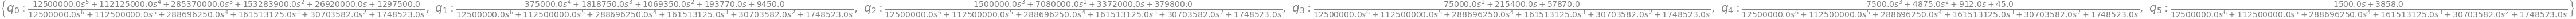

In [15]:
p0 = np.zeros(N)
p0[0] = 1
lhs_eqs = [
    s*q[i] - p0[i] for i in range(N)
]
rhs_eqs = [
    (Lambda.col(i).T * qm)[0] for i in range(N)
]
eqs = [sp.Eq(lhs, rhs) for lhs, rhs in zip(lhs_eqs, rhs_eqs)]
system = eqs[:-1] + [sp.Eq(sum(q), 1/s)]
sol = sp.solve(system, q)
sol

In [16]:
pt = []
for i in range(N):
    res = sum([sp.inverse_laplace_transform(Q, s, t).replace(sp.Heaviside(t), 1) for Q in sol[q[i]].apart().args])
    res_simplified = sp.nsimplify(res)
    pt.append(res_simplified)
pt

In [17]:
pt = []
for i in range(N):
    res = sum([sp.inverse_laplace_transform(Q, s, t).replace(sp.Heaviside(t), 1) for Q in sol[q[i]].apart().args]).simplify()
    pt.append(res)

Вероятность отказа системы: $F(t)=p_4(t)+p_5(t)$

In [18]:
Fp = (pt[4]+pt[5]).simplify()
Ft = sp.lambdify(t, Fp, 'numpy')
Fp

$$F=\lim\limits_{t\to\infty}F(t)\approx 0.002232=0.2232\%$$

In [19]:
F_stat = sp.limit(Fp, t, np.inf)
F_stat, F_stat.evalf()

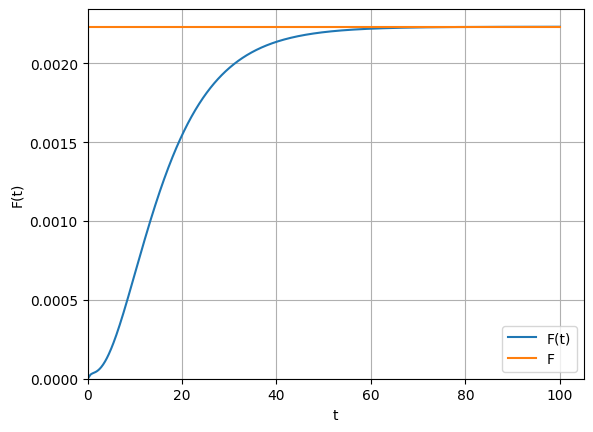

In [20]:
l, r = 0, 100
x = np.linspace(l, r, 1000)
plt.plot(x, Ft(x))
plt.plot([l, r], [F_stat, F_stat])
plt.legend(['F(t)', 'F'])
plt.xlabel('t')
plt.ylabel('F(t)')
plt.grid()
plt.xlim(0)
plt.ylim(0)
plt.show()